# Задача 3
## По трем значениям случайного вектора $({\xi, \eta, \omega})$: $(1, 0, 1)$, $(0, 1, 5)$ и $(1, 1, 2)$:

## a) Найти уравнение линейной регрессии ${\omega = a\xi + b\eta}$;

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from rich.table import Table
from scipy.stats import t, f, norm
from rich.console import Console
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


alpha = 0.05
console = Console()

data = np.array([[1, 0, 1], [0, 1, 5], [1, 1, 2]])

PSI = np.array([[1, 0], [0, 1], [1, 1]])
Y = np.array([1, 5, 2])

F = np.dot(PSI.transpose(), PSI)
F_inverse = np.linalg.inv(F)

beta_wave = np.dot(np.dot(F_inverse, PSI.transpose()), Y)

table = Table(show_header=True, header_style="green")
table.add_column("Коэффициент", justify="center")
table.add_column("Значение", justify="center")
table.add_column("p-value", justify="center")
table.add_column("Значим/Незначим", justify="center")

e = np.array(Y - np.dot(PSI, beta_wave))

RSS = np.dot(e.transpose(), e)

n = len(PSI)
p = len(beta_wave)

for i, beta_i in enumerate(beta_wave):
    delta_wave = abs(beta_i / np.sqrt(RSS * F_inverse[i][i]) * np.sqrt(n - p))
    p_value = 2 * t.sf(delta_wave, n - p)
    table.add_row(
        f"β{i}",
        f"{beta_i:.3f}",
        f"{p_value}",
        f"{'Значим' if p_value < alpha else 'Незначим'}",
    )

console.print(table)

┏━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Коэффициент ┃ Значение ┃      p-value       ┃ Значим/Незначим ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│     β0      │  -0.333  │ 0.8886112459769362 │    Незначим     │
│     β1      │  3.667   │ 0.3023880300802917 │    Незначим     │
└─────────────┴──────────┴────────────────────┴─────────────────┘

### Уравнение линейной регрессии: $${\omega = -0.333\xi + 3.667\eta},$$


## b) Найти уравнение ridge регрессии ${\omega = a\xi + b\eta}$, построить график CVSS и определить значение параметра регуляризации;

In [55]:
N = 10000
CVSS = []

for i in range(N):
    CVSS.append(0)
    for j in range(3):
        train_x = list(PSI)
        test_x = train_x.pop(j)

        train_y = list(Y)
        test_y = train_y.pop(j)

        ridge = Ridge(alpha=alpha(i), fit_intercept=False, max_iter=10000).fit(
            train_x, train_y
        )

        y_wave = np.dot(ridge.coef_, test_x)

        CVSS[i] += (test_y - y_wave) ** 2

alpha_opt = alpha(CVSS.index(min(CVSS)))
console.print(f"Оптимальное α = {alpha_opt}")

ridge_opt = Ridge(alpha=alpha_opt, fit_intercept=False, max_iter=10000).fit(PSI, Y)

table = Table(show_header=True, header_style="green")
table.add_column("Коэффициент", justify="center")
table.add_column("Значение", justify="center")

for i in range(len(ridge_opt.coef_)):
    table.add_row(f"β{i}", f"{ridge_opt.coef_[i]:.3f}")

console.print(f"Коэффициенты ridge регрессии:")
console.print(table)

TypeError: 'float' object is not callable

### Уравнение ridge регрессии: $${\omega = 0.312\xi + 1.908\eta},$$

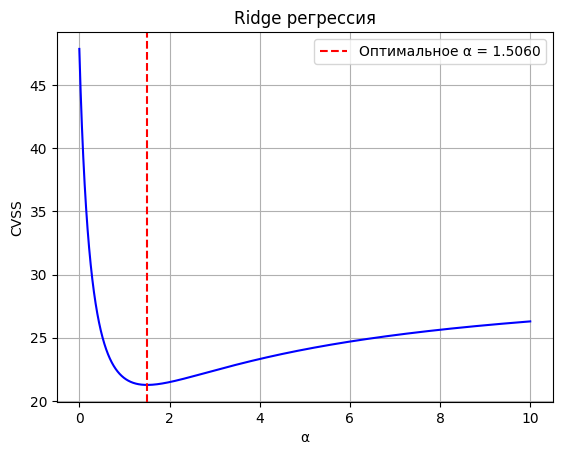

In [ ]:
plt.plot(np.linspace(0, 10, N), CVSS, color="blue")

plt.xlabel("α")
plt.ylabel("CVSS")
plt.title("Ridge регрессия")
plt.grid(True)
plt.axvline(
    alpha_opt, color="red", linestyle="--", label=f"Оптимальное α = {alpha_opt:.4f}"
)
plt.legend()
plt.show()

## c) Найти уравнение lasso регрессии ${\omega = a\xi + b\eta}$, построить график CVSS и определить значение параметра регуляризации.

In [ ]:
N = 10000
CVSS = []

for i in range(N):
    CVSS.append(0)
    for j in range(3):
        train_x = list(PSI)
        test_x = train_x.pop(j)

        train_y = list(Y)
        test_y = train_y.pop(j)

        lasso = Lasso(alpha=alpha(i), fit_intercept=False, max_iter=10000).fit(
            train_x, train_y
        )

        y_wave = np.dot(lasso.coef_, test_x)

        CVSS[i] += (test_y - y_wave) ** 2

alpha_opt = alpha(CVSS.index(min(CVSS)))
console.print(f"Оптимальное α = {alpha_opt}")

lasso_opt = Lasso(alpha=alpha_opt, fit_intercept=False, max_iter=10000).fit(PSI, Y)

table = Table(show_header=True, header_style="green")
table.add_column("Коэффициент", justify="center")
table.add_column("Значение", justify="center")

for i in range(len(lasso_opt.coef_)):
    table.add_row(f"β{i}", f"{lasso_opt.coef_[i]:.3f}")

console.print(f"Коэффициенты lasso регрессии:")
console.print(table)

Оптимальное α = 1.5

Коэффициенты lasso регрессии:

┏━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Коэффициент ┃ Значение ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━┩
│     β0      │  0.000   │
│     β1      │  1.250   │
└─────────────┴──────────┘

### Уравнение lasso регрессии: $${\omega = 0\xi + 1.25\eta},$$

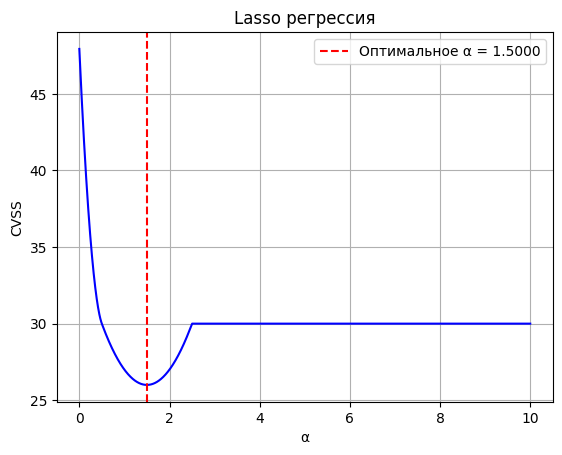

In [ ]:
plt.plot(np.linspace(0, 10, N), CVSS, color="blue")

plt.xlabel("α")
plt.ylabel("CVSS")
plt.title("Lasso регрессия")
plt.grid(True)
plt.axvline(
    alpha_opt, color="red", linestyle="--", label=f"Оптимальное α = {alpha_opt:.4f}"
)
plt.legend()
plt.show()